# Punto crítico en la ec. de Van der Waals

#### Hugo Rivera Morales
#### Física Estadística

In [6]:
# Paqueterias
import sympy as sp
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import decimal  
import cmath

In [7]:
# Constantes
# Cte gases
R = 8.31446261815324 # J/(K*mol)	
# Ctes de van der waals
# Agua
a_A = 0.5537 # (m^6*Pa)/mol
b_A = 3.049e-5 # m^3/mol
# Helio
a_H = 0.00346
b_H = 2.38e-5
# Metano
a_M = 0.23
b_M = 4.301e-5
# Sustancia X (cualquier otra sustancia)
a_X = 0
b_X = 0

# Ej. Metano
a = a_M
b = b_M

# Ecuaciones de estado (normal y reducida)
def P(V, T):
    return (R*T)/(V-b)-a/(V**2)
def p(v, t):
    return (8*t)/(3*v-1)-(3)/(v**2)

# Valores criticos
Tc = (8*a)/(27*R*b)
Vc = 3*b
Pc = (a)/(27*b**2)

# Variables termodiámicas
V = np.linspace(0.5*Vc, 4*Vc, 1000)
dT = np.linspace(0.7*Tc, 1.05*Tc, 12)

# Variables termodiámicas reducidas
v = V/Vc
dt = dT/Tc

Primero se muestran las isotermas para el caso de la ecuacón reducida:

$$p = \frac{8t}{3v-1}-\frac{3}{v^2}$$

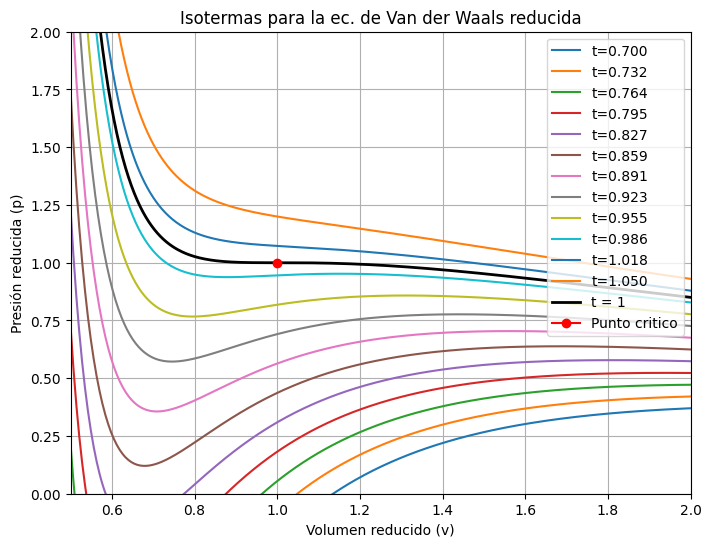

In [8]:
# Isotermas para el caso de la ecuación reducida
plt.figure(figsize=(8,6))
for t in dt:
    y2 = p(v, t)
    plt.plot(v, y2, label=f"t={decimal.Decimal(t).quantize(decimal.Decimal('0.000'))}")
plt.plot(v, p(v, 1), color='black', label=f"t = 1", linewidth=2)
plt.plot(1,1, marker="o", color='r', label=f"Punto critico")
plt.legend(loc='upper right')
plt.ylim(0, 2)
plt.xlim(0.5, 2)
plt.xlabel(f'Volumen reducido (v)')
plt.ylabel(f'Presión reducida (p)')
plt.title(f"Isotermas para la ec. de Van der Waals reducida")
plt.grid()
plt.show()

Graficando ahora las isotermas y el punto critico para la ecuacón de estado de Van der Waals: 

$$P = \frac{RT}{V-b}-\frac{a}{V^2}$$

El punto critico para esta sustancia con a = 0.23 m^6 Pa/mol y b = 4.301e-05 m^3/mol está en:
Tc = 190.56819971119197 K
Vc = 0.00012903 m^3/mol
Pc = 4604952.83860575 pa


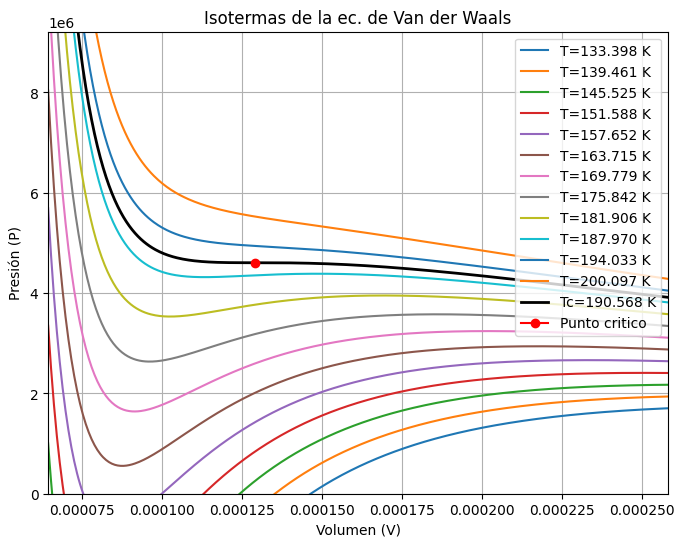

In [9]:
# Punto critico
print("El punto critico para esta sustancia con a =",a, "m^6 Pa/mol", "y b =",b, "m^3/mol", "está en:")  

print("Tc =", Tc, "K")  
print("Vc =", Vc, "m^3/mol")  
print("Pc =", Pc, "pa") 

# Isotermas para el caso de la ecuación normal
plt.figure(figsize=(8,6))
for T in dT:
    y1 = P(V, T)
    plt.plot(V, y1, label=f"T={decimal.Decimal(T).quantize(decimal.Decimal('0.000'))} K")
plt.plot(V, P(V, Tc), color='black', label=f"Tc={decimal.Decimal(Tc).quantize(decimal.Decimal('0.000'))} K", linewidth=2)
plt.plot(Vc,Pc, marker="o", color='r', label=f"Punto critico")
plt.legend(loc='upper right')
plt.ylim(0, 2*Pc)
plt.xlim(0.5*Vc, 2*Vc)
plt.xlabel('Volumen (V)')
plt.ylabel('Presión (P)')
plt.title("Isotermas de la ec. de Van der Waals")
plt.grid()
plt.show()

Para un caso especifico de una isoterma por debajo del punto critico $T < T_{c}$, el volumen reducido ocupado por el liquido ($v_{l}$) y el del gas ($v_{g}$) a una cierta presión reducida $p_{c}$ viene dado como:

Para esta sustancia con a = 0.23 m^6 Pa/mol & b = 4.301e-05 m^3/mol
A temperatura normal y reducida: t = 0.85 & T = 161.98296975451316 K
Y presión normal y reducida:  p =  0.5 & P = 2302476.419302875 m^3/mol
El volumen normal y el reducido del liquido son: v = 0.5537557012636652 & V = 7.145109813405072e-05 m^3/mol
El volumen normal y el reducido del gas son: v = 3.175572396999292 & V = 0.0004097441063848186 m^3/mol


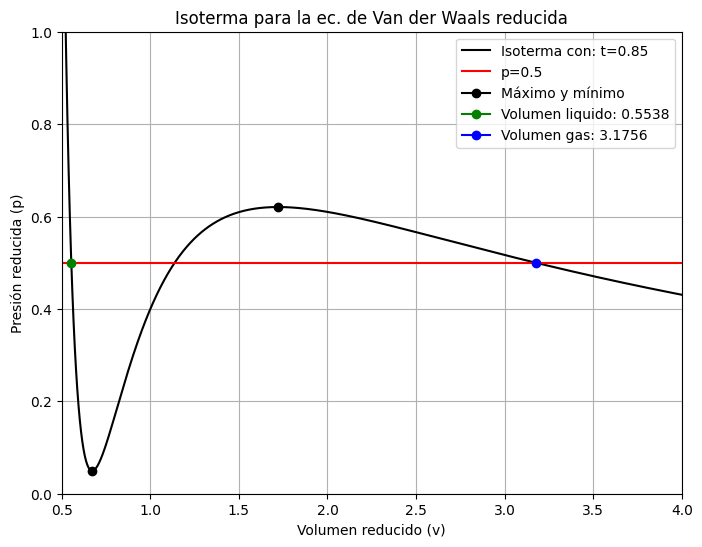

In [10]:
# Temperatura y presión especificas
tc = 0.85
pc = 0.5

# Encontrar los máximos para la temperatura dada
coeffs = [1, -(9)/(4*tc), (3)/(2*tc), -(1)/(4*tc)]
roots = np.roots(coeffs)

# Puntos criticos de la función p(v)
v1 = roots[1]
v2 = roots[0]
p1 = p(v1,tc)
p2 = p(v2,tc)

print("Para esta sustancia con a =",a, "m^6 Pa/mol", "& b =",b, "m^3/mol")  

# Si la presión utilizada se encuentra dentro del intervalo de los extremos locales
if pc < p2 and pc > p1:

    # Encuentra intersección con la presión dada
    coeffs = [3*pc, -(pc+8*tc), 9, -3]
    roots = np.roots(coeffs)
    
    # Valores de los puntos de intersección
    vl = roots[2]
    vlg = roots[1]
    vg = roots[0]
    pl = p(vl,tc)
    pg = p(vg,tc)

    Vl = vl*Vc
    Pl = pl*Pc
    Vg = vg*Vc
    Pg = pg*Pc

    T1 = tc*Tc
    P1 = pc*Pc

    print("A temperatura normal y reducida: t =",tc, "& T =",T1, "K")
    print("Y presión normal y reducida:  p = ",pc, "& P =",P1, "m^3/mol")
    print("El volumen normal y el reducido del liquido son: v =",vl, "& V =",Vl, "m^3/mol")
    print("El volumen normal y el reducido del gas son: v =",vg, "& V =",Vg, "m^3/mol")
     
    y3 = p(v, tc)
    plt.figure(figsize=(8,6))
    plt.plot(v, y3, color='black', label=f"Isoterma con: t={tc}")
    plt.axhline(y=pc, color='r', linestyle='-', label=f"p={pc}")
    plt.plot(v1,p1, marker="o", color='black', label=f"Máximo y mínimo")
    plt.plot(v2,p2, marker="o", color='black')
    plt.plot(vl,pc, marker="o", color='g', label=f"Volumen liquido: {decimal.Decimal(vl).quantize(decimal.Decimal('0.0000'))}")
    plt.plot(vg,pc, marker="o", color='b', label=f"Volumen gas: {decimal.Decimal(vg).quantize(decimal.Decimal('0.0000'))}")
    plt.legend()
    plt.ylim(0, 1)
    plt.xlim(0.5, 4)
    plt.xlabel('Volumen reducido (v)')
    plt.ylabel('Presión reducida (p)')
    plt.title("Isoterma para la ec. de Van der Waals reducida")
    plt.grid()
    plt.show()

elif pc > p2:
    print("La presión dada está por encima del máximo local de la presión reducida")
else:
    print("La presión dada está por debajo del mínimo local de la presión reducida")